<a href="https://colab.research.google.com/github/ViniRahmeier/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# Análise dos Dados do Airbnb - ***Tóquio***

O [Airbnb](https://www.airbnb.com.br/) é uma empresa cuja principal função é a de conectar pessoas interessadas em viajar (e que buscam por hospedagem), com outras que disponibizam eventuais acomodações, atráves de uma plataforma online ou por meio de dowload do aplicativo para mobile se você ultilizar o smartfone. 

A Empresa nasceu em 2007, quando dois anfitriões receberam três hóspedes em sua casa em São Francisco. Hoje, conta com mais de 4 milhões de anfitriões, que já receberam mais de 1 bilhão de hóspedes em quase todos os países. Todos os dias, os anfitriões oferecem acomodações e experiências únicas, que possibilitam aos hóspedes uma conexão mais autêntica com as comunidades.

Dentro do site oficial do Airbnb, existe uma aba onde são disponibilizadas uma série de dados sobre as reservas que aconteceram em diversas cidades do mundo, tudo na legalidade e transparência.

[Inside Airbnb](http://insideairbnb.com/get-the-data.html), é o caminho onde você poderá encontrar dados para auxiliar e servir com base para seus projetos de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


**Neste *notebook*, iremos analisar os dados referentes à cidade de Tóquio, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
A partir do site do [Airbnb](http://insideairbnb.com/get-the-data/) temos acesso a alguns conjuntos de dados de certas localidades ao redor do mundo.

Para esta análise inicial, será utilizado um conjunto resumido desses dados da cidade de Tóquio.


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2022-09-22/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias
* number_of_reviews_ltm - número de reviews dos últimos 12 meses 
* license - licença de acomodação (de acordo com as regras de determinados países, se faz necessário)

 
Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*,  analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

### **. Entradas e tipagem das variáveis em questão:**

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset, perceba os tipos de dados das variáveis:
display(df.dtypes)

Entradas:	 9823
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **. Porcentagem de valores ausentes no *dataset*:**

In [6]:
# porcentagem dos valores ausentes das variáveis (do maior para o menor):

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

neighbourhood_group               100.000000
reviews_per_month                  15.545149
last_review                        15.545149
license                             0.346126
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### **. Histograma e primeiras impressões:** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f224df83bb0>,
      dtype=object)

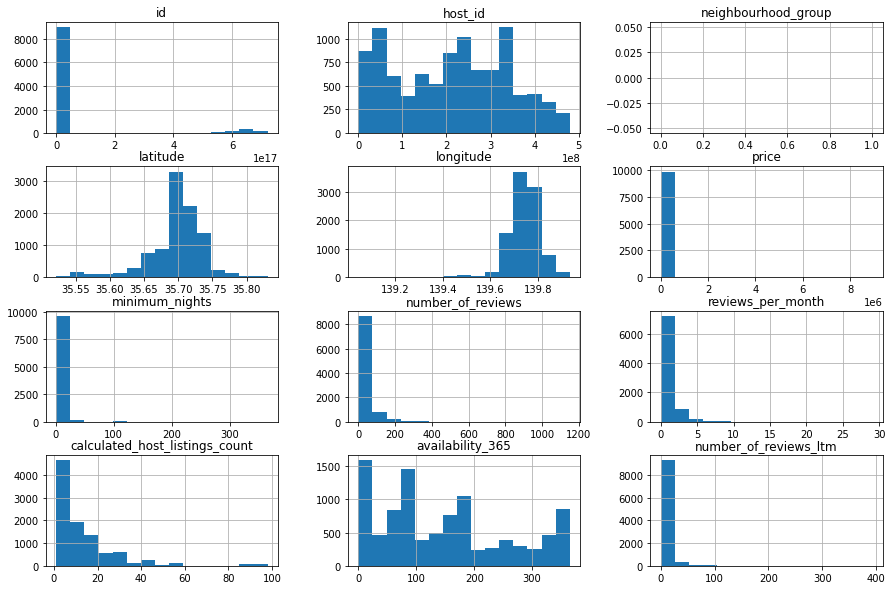

In [7]:
# Histograma das variáveis numéricas
df.hist(bins=15 , figsize=(15,10))

### **. Qual a média dos preços de aluguel?**

In [9]:
# ver a média da coluna `price``
print(f'A média dos preços é de: {round(df.price.mean(), 2)} yens')

A média dos preços é de: 14985.82 yens


### **. Correlação das variáveis:**

In [8]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.088134,-0.013845,-0.009642,-0.002601,0.003637
minimum_nights,0.088134,1.000000,-0.028074,-0.057072,-0.037494,-0.008200
number_of_reviews,-0.013845,-0.028074,1.000000,0.690896,-0.164404,-0.007105
reviews_per_month,-0.009642,-0.057072,0.690896,1.000000,-0.100246,0.017868
calculated_host_listings_count,-0.002601,-0.037494,-0.164404,-0.100246,1.000000,0.014844
availability_365,0.003637,-0.008200,-0.007105,0.017868,0.014844,1.000000


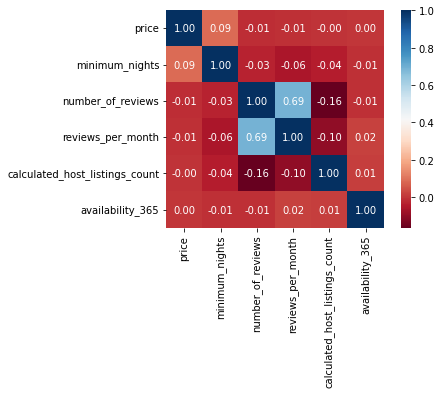

In [11]:
# Mapa de calor das correlações:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# Aqui será levantado a quantidade de solicitações por tipo de acomodação:
df.room_type.value_counts()

Entire home/apt    6812
Private room       2427
Hotel room          343
Shared room         241
Name: room_type, dtype: int64

In [ ]:
# Representatividade em percentual:
(df.room_type.value_counts() / df.shape[0]) * 100

Entire home/apt    69.347450
Private room       24.707320
Hotel room          3.491805
Shared room         2.453426
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [12]:
# Levantamento dos valores por bairros da cidade:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Okutama Machi    52914.250000
Kodaira Shi      40435.500000
Minato Ku        39716.958442
Chuo Ku          33952.847118
Hinohara Mura    30686.000000
Edogawa Ku       25562.671937
Shinagawa Ku     20431.109827
Chiyoda Ku       17805.695238
Mitaka Shi       16424.111111
Toshima Ku       15912.775401
Name: price, dtype: float64

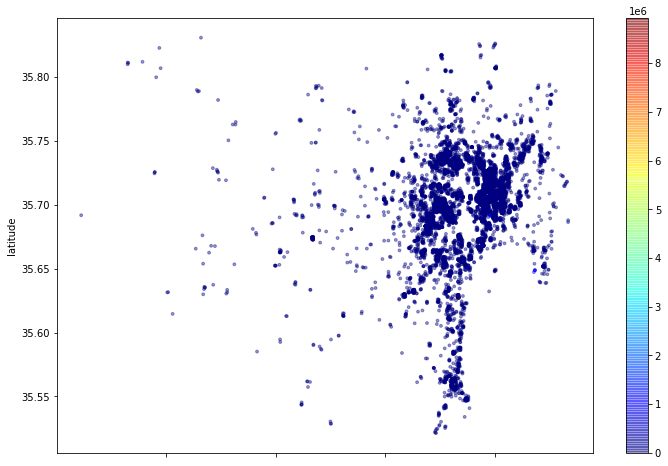

In [ ]:
# Localização georeferenciada das acomodações:
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [13]:
# Minímo de noites alugadas (média):
round(df.minimum_nights.mean(), 2)

2.54

## Conclusões


O objetivo desta análise superficial dos dados da cidade de Tóquio é de caráter didático e prático, pois as informações contidas nesta base de dados são resumidas e pussem outliers que não foram removidos de maneira metodologica.

Por exemplo, na filtragem de bairros mais caros, temos Okutama Machi e Kodaira Shi aparecendo nas primeiras colocações, mas fazendo uma pesquisa simples, bairros como Azubu, Ginza e Shibuya são os mais *expensives* do Japão e não aparecem na análise.    

Para fins de abstração, os gráficos plotados neste notebook e as análises de valores podem forncer alguma noção do mercado de acomodação e hospedagem fornecidos por usuários do Airbnb na cidade de Tóquio. Como o tipo de acomodação mais requisitada, que são os *Entire home/apt* com aproximadademente 69% dos pedidos.
